# **Final Project: AI in Marketing**

# **Prepared by: Zeinep Kurmashova, Samir Umarov and Yersaiyn Meiramuly**

**Topic: Movie Recommendation System Using Content-Based and Collaborative Filtering**

This project presents a dual-model movie recommendation system that combines content-based filtering and collaborative filtering techniques. It demonstrates how artificial intelligence can personalize user experience, boost retention, and increase conversion through intelligent content suggestions — a powerful marketing tool for any digital platform.

# **Step 1: Loading the dataset**

In [1]:
import pandas as pd

# Загрузка объединенного датасета
df = pd.read_csv("full_movie_dataset.csv")

# Просмотр первых строк
df.head()

,user_id,movie_id,rating,timestamp,title,genres,gender,age,occupation,zip_code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


In [2]:
df.info

<bound method DataFrame.info of          user_id  movie_id  rating  timestamp  \
0              1      1193       5  978300760   
1              1       661       3  978302109   
2              1       914       3  978301968   
3              1      3408       4  978300275   
4              1      2355       5  978824291   
...          ...       ...     ...        ...   
1000204     6040      1091       1  956716541   
1000205     6040      1094       5  956704887   
1000206     6040       562       5  956704746   
1000207     6040      1096       4  956715648   
1000208     6040      1097       4  956715569   

                                          title  \
0        One Flew Over the Cuckoo's Nest (1975)   
1              James and the Giant Peach (1996)   
2                           My Fair Lady (1964)   
3                        Erin Brockovich (2000)   
4                          Bug's Life, A (1998)   
...                                         ...   
1000204              W

# **Step 2: Basic Analytics | Data Cleaning & Preprocessing**

In [3]:
# Кол-во уникальных пользователей и фильмов
num_users = df['user_id'].nunique()
num_movies = df['movie_id'].nunique()

print(f"Уникальных пользователей: {num_users}")
print(f"Уникальных фильмов: {num_movies}")

Уникальных пользователей: 6040
Уникальных фильмов: 3706


In [4]:
# Распределение рейтингов
rating_counts = df['rating'].value_counts().sort_index()
print("\nРаспределение оценок:")
print(rating_counts)


Распределение оценок:
rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: count, dtype: int64


In [5]:
# Топ-10 самых часто встречающихся жанров
from collections import Counter

# Разбиваем строку жанров и собираем частоту
genre_counts = Counter()
for genres in df['genres']:
    genre_counts.update(genres.split('|'))

# Преобразуем в датафрейм
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

print("\nТоп жанров:")
print(genre_df.head(10))


Топ жанров:
         Genre   Count
5       Comedy  356580
0        Drama  354529
6       Action  257457
11    Thriller  189680
9       Sci-Fi  157294
4      Romance  147523
7    Adventure  133953
12       Crime   79541
15      Horror   76386
2   Children's   72186


In [6]:
# --- 1. Проверка и удаление пропущенных значений ---
print("Пропущенные значения:\n", df.isnull().sum())

Пропущенные значения:
 user_id       0
movie_id      0
rating        0
timestamp     0
title         0
genres        0
gender        0
age           0
occupation    0
zip_code      0
dtype: int64


In [7]:
# --- 2. Удаление дубликатов ---
print(f"\nДо удаления дубликатов: {df.shape[0]} строк")
df = df.drop_duplicates()
print(f"После удаления дубликатов: {df.shape[0]} строк")


До удаления дубликатов: 1000209 строк
После удаления дубликатов: 1000209 строк


In [8]:
# --- 3. Проверка диапазона значений в рейтингах (на выбросы) ---
print("\nУникальные значения rating:", sorted(df['rating'].unique()))


Уникальные значения rating: [1, 2, 3, 4, 5]


In [9]:
# --- 4. Проверка возраста (в кодах) ---
print("Возрастные категории:", sorted(df['age'].unique()))

Возрастные категории: [1, 18, 25, 35, 45, 50, 56]


In [10]:
# --- 5. Проверка occupation ---
print("Профессии (occupation):", sorted(df['occupation'].unique()))

Профессии (occupation): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [11]:
# --- 6. Нормализация рейтингов (по желанию) ---
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['rating_normalized'] = scaler.fit_transform(df[['rating']])

# Просмотр результата
print(df[['rating', 'rating_normalized']].head())


   rating  rating_normalized
0       5               1.00
1       3               0.50
2       3               0.50
3       4               0.75
4       5               1.00


### Распределение рейтингов 

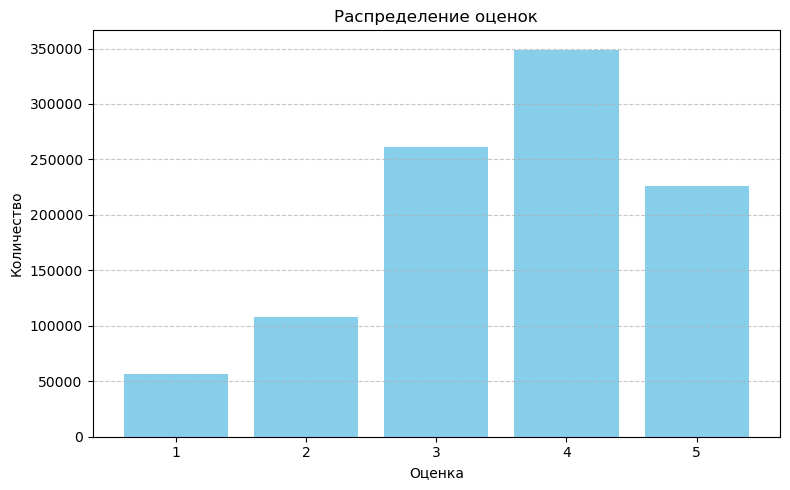

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

rating_counts = df['rating'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index.astype(str), rating_counts.values, color='skyblue')
plt.title("Распределение оценок")
plt.xlabel("Оценка")
plt.ylabel("Количество")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Топ-10 жанров по частоте

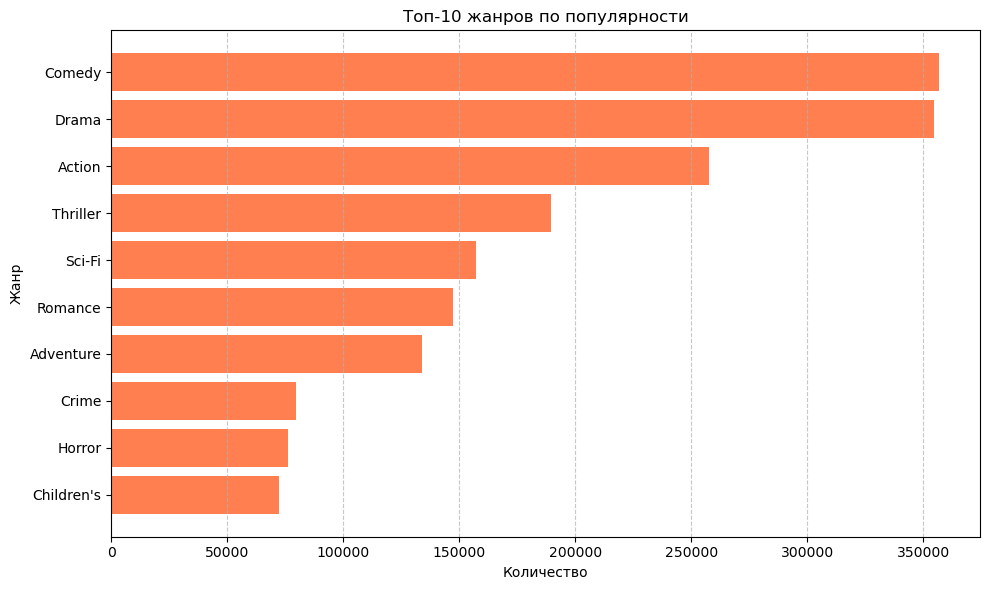

In [13]:
genre_counts = Counter()
for genres in df['genres']:
    genre_counts.update(genres.split('|'))

# Преобразуем в датафрейм
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(genre_df['Genre'][:10][::-1], genre_df['Count'][:10][::-1], color='coral')
plt.title("Топ-10 жанров по популярности")
plt.xlabel("Количество")
plt.ylabel("Жанр")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**📊 Основная статистика:**

* 👤 **Пользователей:** `6,040`
* 🎬 **Фильмов:** `3,706`

⭐ **Распределение оценок:**

* Больше всего оценок поставили на **4 балла**
* Самая редкая оценка — **1** (56174 раз)

🔥 **Топ-10 жанров:**

| Жанр       | Кол-во  |
| ---------- | ------- |
| Comedy     | 356,580 |
| Drama      | 354,529 |
| Action     | 257,457 |
| Thriller   | 189,680 |
| Sci-Fi     | 157,294 |
| Romance    | 147,523 |
| Adventure  | 133,953 |
| Crime      | 79,541  |
| Horror     | 76,386  |
| Children's | 72,186  |

### Распределение пользователей по полу

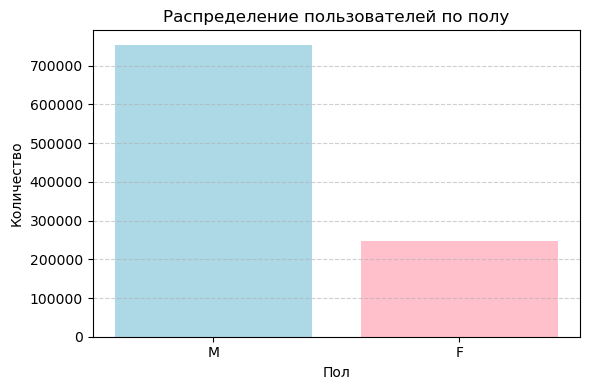

In [14]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, color=['lightblue', 'pink'])
plt.title("Распределение пользователей по полу")
plt.xlabel("Пол")
plt.ylabel("Количество")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Распределение пользователей по возрастным группам

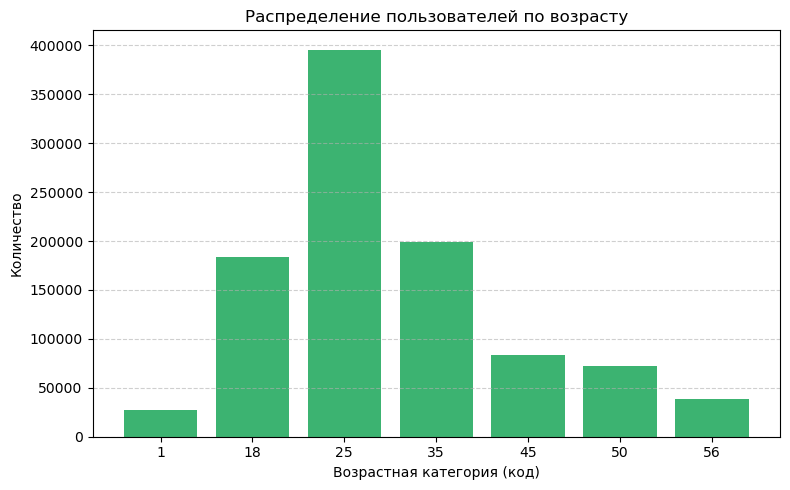

In [15]:
age_counts = df['age'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(age_counts.index.astype(str), age_counts.values, color='mediumseagreen')
plt.title("Распределение пользователей по возрасту")
plt.xlabel("Возрастная категория (код)")
plt.ylabel("Количество")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Средняя оценка по каждому жанру

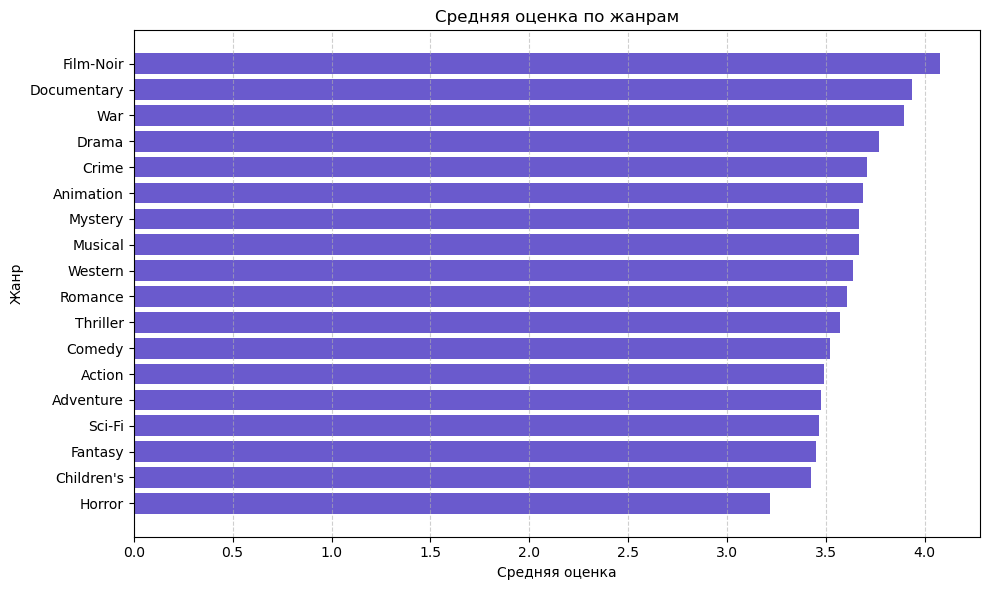

In [16]:
# Создаём таблицу: жанр — список всех рейтингов
genre_ratings = {}

for _, row in df.iterrows():
    for genre in row['genres'].split('|'):
        genre_ratings.setdefault(genre, []).append(row['rating'])

# Среднее значение
avg_genre_ratings = {genre: sum(ratings) / len(ratings) for genre, ratings in genre_ratings.items()}

# В датафрейм
avg_genre_df = pd.DataFrame(avg_genre_ratings.items(), columns=['Genre', 'Average Rating'])
avg_genre_df = avg_genre_df.sort_values(by='Average Rating', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(avg_genre_df['Genre'][::-1], avg_genre_df['Average Rating'][::-1], color='slateblue')
plt.title("Средняя оценка по жанрам")
plt.xlabel("Средняя оценка")
plt.ylabel("Жанр")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Топ-10 фильмов с наивысшим средним рейтингом (с минимум 50 оценками)

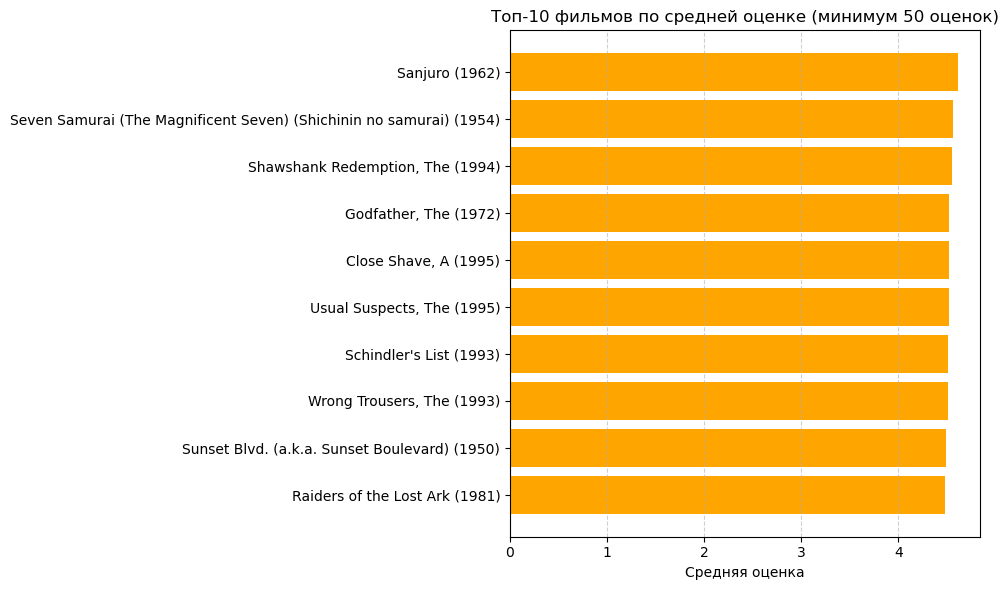

In [17]:
# Считаем количество оценок на фильм
movie_stats = df.groupby('title').agg({'rating': ['mean', 'count']})
movie_stats.columns = ['avg_rating', 'num_ratings']

# Фильтруем: только фильмы с >= 50 оценками
popular_movies = movie_stats[movie_stats['num_ratings'] >= 50].sort_values(by='avg_rating', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(popular_movies.index[::-1], popular_movies['avg_rating'][::-1], color='orange')
plt.title("Топ-10 фильмов по средней оценке (минимум 50 оценок)")
plt.xlabel("Средняя оценка")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Средняя оценка фильмов по полу

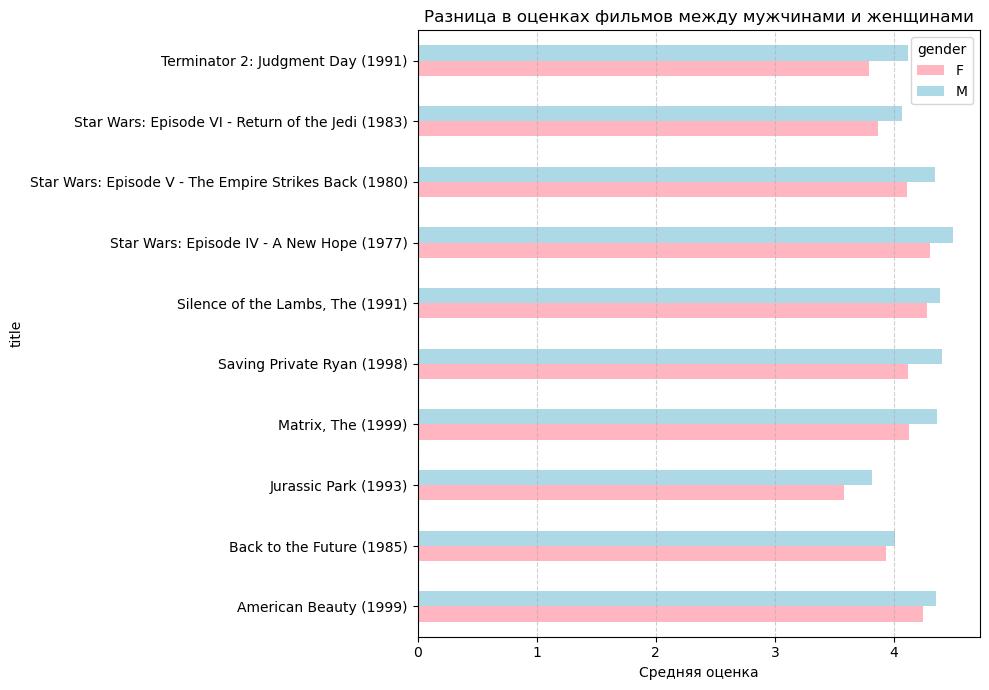

In [43]:
# Группировка: (title, gender) → средняя оценка
gender_rating = df.groupby(['title', 'gender'])['rating'].mean().unstack()

# Фильтруем только популярные фильмы
popular_titles = df['title'].value_counts().head(10).index
gender_rating_top = gender_rating.loc[gender_rating.index.isin(popular_titles)]

# Построим график
gender_rating_top.plot(kind='barh', figsize=(10, 7), color=['lightpink', 'lightblue'])
plt.title("Разница в оценках фильмов между мужчинами и женщинами")
plt.xlabel("Средняя оценка")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Корреляция средней оценки по жанрам и возрасту

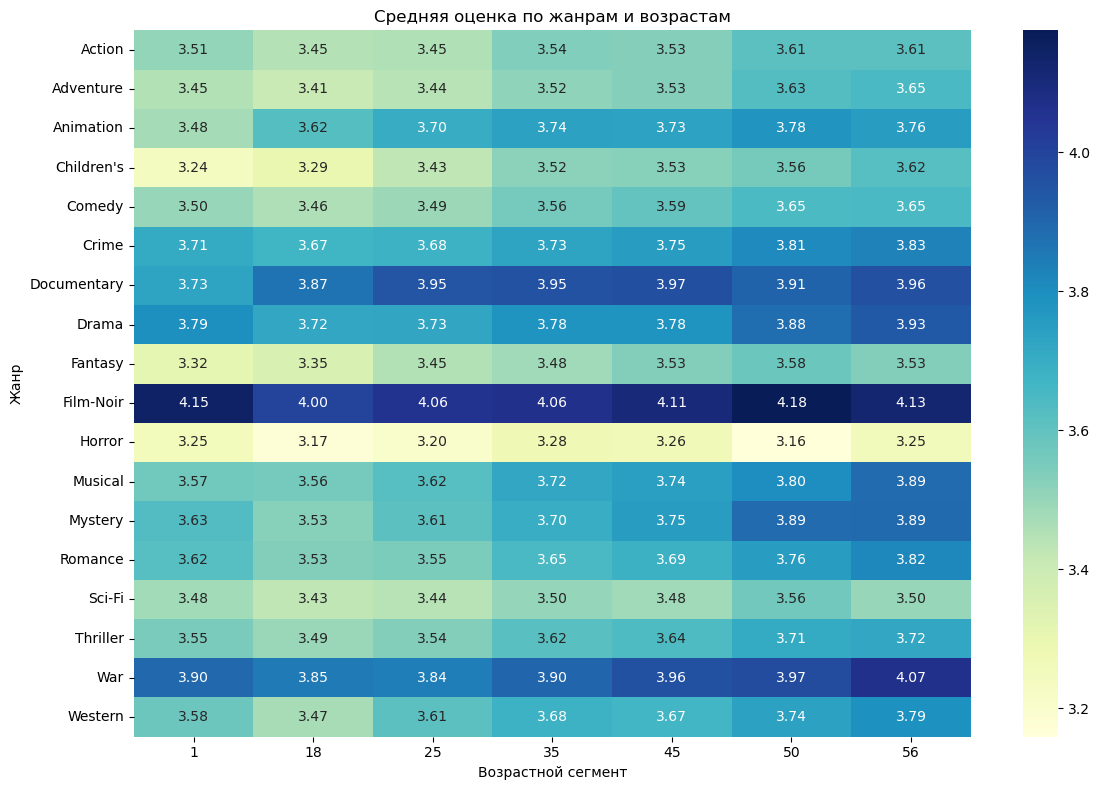

In [19]:
# Создаем словарь: (жанр, возраст) → список рейтингов
genre_age_ratings = {}

for _, row in df.iterrows():
    for genre in row['genres'].split('|'):
        key = (genre, row['age'])
        genre_age_ratings.setdefault(key, []).append(row['rating'])

# Средние оценки
records = []
for (genre, age), ratings in genre_age_ratings.items():
    records.append((genre, age, sum(ratings)/len(ratings)))

# Преобразуем в датафрейм
genre_age_df = pd.DataFrame(records, columns=['Genre', 'Age', 'Avg_Rating'])

# Построим тепловую карту
pivot = genre_age_df.pivot(index='Genre', columns='Age', values='Avg_Rating')

import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Средняя оценка по жанрам и возрастам")
plt.xlabel("Возрастной сегмент")
plt.ylabel("Жанр")
plt.tight_layout()
plt.show()

# **Step 3:	Recommender System Implementation**

Теперь мы начинаем **контентную рекомендательную систему (Content-Based Filtering)**. Она будет советовать фильмы **по жанрам**, схожим с уже понравившимися пользователю.

## Что мы делаем:

1. Преобразуем жанры в вектор (TF-IDF)
2. Считаем схожесть между фильмами (косинусная)
3. Делаем функцию: **"Порекомендуй мне фильмы, похожие на X"**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# --- 1. Убираем дубликаты фильмов (если есть одинаковые названия) ---
movie_df = df[['movie_id', 'title', 'genres']].drop_duplicates().reset_index(drop=True)

# --- 2. TF-IDF по жанрам ---
tfidf = TfidfVectorizer(token_pattern=r'[^|]+')  # Разделяем по "|"
tfidf_matrix = tfidf.fit_transform(movie_df['genres'])

# --- 3. Косинусное сходство ---
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)  # размер: [n_films x n_films]

# --- 4. Функция для получения рекомендаций по названию ---
def get_recommendations(title, cosine_sim=cosine_sim, top_n=10):
    # Получаем индекс фильма
    idx = movie_df[movie_df['title'] == title].index[0]
    # Пары (индекс, сходство)
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Сортируем по сходству (по убыванию), исключаем сам фильм
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    # Получаем индексы похожих фильмов
    movie_indices = [i[0] for i in sim_scores]
    return movie_df['title'].iloc[movie_indices]

# --- Пример: покажем похожие фильмы на "Toy Story (1995)" ---
print("Похожие на Toy Story:")
print(get_recommendations("Toy Story (1995)"))

Похожие на Toy Story:
40                                    Toy Story (1995)
50                                  Toy Story 2 (1999)
531                                 Chicken Run (2000)
1034                          American Tail, An (1986)
1035        American Tail: Fievel Goes West, An (1991)
1086            Aladdin and the King of Thieves (1996)
2187                         Rugrats Movie, The (1998)
2328    Adventures of Rocky and Bullwinkle, The (2000)
3218                             Saludos Amigos (1943)
16                                       Tarzan (1999)
Name: title, dtype: object


In [59]:
# --- Функция рекомендаций по названию фильма ---
def get_recommendations(title, cosine_sim=cosine_sim, top_n=10):
    title = title.lower()
    matches = movie_df[movie_df['title'].str.lower().str.contains(title, regex=False)]

    if matches.empty:
        print("❌ Фильм не найден. Попробуйте ввести точнее.")
        return []

    idx = matches.index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]

    print(f"Похожие фильмы на: {movie_df.loc[idx, 'title']}\n")
    return movie_df['title'].iloc[movie_indices].tolist()

# --- Интерактивный ввод пользователя ---
user_input = input("Введите название фильма: ")
recommendations = get_recommendations(user_input)

# --- Вывод результата ---
if recommendations:
    for i, movie in enumerate(recommendations, 1):
        print(f"{i}. {movie}")

Введите название фильма:   wq


❌ Фильм не найден. Попробуйте ввести точнее.


Теперь делаем **следующий шаг** — рекомендации **для конкретного пользователя** на основе того, что ему понравилось. Это всё ещё content-based, но **персонализированное**.

## **Content-Based: Персональные рекомендации по любимым фильмам пользователя**

### Идея:

1. Выбираем `user_id`
2. Смотрим, какие фильмы он оценил высоко (например, на 4 или 5)
3. Для каждого из этих фильмов находим похожие
4. Объединяем и ранжируем по похожести

In [45]:
def recommend_for_user(user_id, df, top_n=10):
    # Получаем фильмы, которые пользователь оценил на 4 или 5
    high_rated = df[(df['user_id'] == user_id) & (df['rating'] >= 4)]
    liked_titles = high_rated['title'].unique()
    
    print(f"Пользователь {user_id} любит:\n", liked_titles[:5])

    # Храним рекомендации в словаре: название → суммарная схожесть
    recommendations = {}

    for title in liked_titles:
        if title in movie_df['title'].values:
            idx = movie_df[movie_df['title'] == title].index[0]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
            for i, score in sim_scores:
                rec_title = movie_df['title'].iloc[i]
                if rec_title not in liked_titles:
                    recommendations[rec_title] = recommendations.get(rec_title, 0) + score

    # Сортировка по сумме сходства
    sorted_recs = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return [title for title, _ in sorted_recs]

# --- Пример: рекомендации для user_id = 1 ---
print("\nРекомендации для пользователя 1:")
print(recommend_for_user(1, df))


Рекомендации для пользователя 1:
Пользователь 1 любит:
 ["One Flew Over the Cuckoo's Nest (1975)" 'Erin Brockovich (2000)'
 "Bug's Life, A (1998)" 'Ben-Hur (1959)' 'Christmas Story, A (1983)']
['Anastasia (1997)', 'Lion King, The (1994)', 'Fantasia (1940)', 'Sleeping Beauty (1959)', 'Alice in Wonderland (1951)', 'Chicken Run (2000)', 'American Tail, An (1986)', 'American Tail: Fievel Goes West, An (1991)', 'Aladdin and the King of Thieves (1996)', 'Rugrats Movie, The (1998)']


In [62]:
# --- Функция: рекомендации по user_id ---
def recommend_for_user(user_id, df, top_n=10):
    # Фильмы, которые пользователь оценил ≥ 4
    high_rated = df[(df['user_id'] == user_id) & (df['rating'] >= 4)]
    liked_titles = high_rated['title'].unique()
    
    if len(liked_titles) == 0:
        print(f"❌ У пользователя {user_id} нет фильмов с высокой оценкой.")
        return []
    
    print(f"Пользователь {user_id} любит:\n", liked_titles[:5])

    recommendations = {}

    for title in liked_titles:
        if title in movie_df['title'].values:
            idx = movie_df[movie_df['title'] == title].index[0]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
            for i, score in sim_scores:
                rec_title = movie_df['title'].iloc[i]
                if rec_title not in liked_titles:
                    recommendations[rec_title] = recommendations.get(rec_title, 0) + score

    # Сортировка по сумме сходства
    sorted_recs = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:top_n]
    return [title for title, _ in sorted_recs]

# --- Интерактивный ввод ---
try:
    user_input = int(input("Введите ID пользователя: "))
    user_recs = recommend_for_user(user_input, df)

    if user_recs:
        print("\n🎯 Рекомендации для пользователя:")
        for i, title in enumerate(user_recs, 1):
            print(f"{i}. {title}")
except ValueError:
    print("❌ Введите корректный числовой ID пользователя.")

Введите ID пользователя:  1


Пользователь 1 любит:
 ["One Flew Over the Cuckoo's Nest (1975)" 'Erin Brockovich (2000)'
 "Bug's Life, A (1998)" 'Ben-Hur (1959)' 'Christmas Story, A (1983)']

🎯 Рекомендации для пользователя:
1. Anastasia (1997)
2. Lion King, The (1994)
3. Fantasia (1940)
4. Sleeping Beauty (1959)
5. Alice in Wonderland (1951)
6. Chicken Run (2000)
7. American Tail, An (1986)
8. American Tail: Fievel Goes West, An (1991)
9. Aladdin and the King of Thieves (1996)
10. Rugrats Movie, The (1998)


### Что мы получили:

* Персональный список фильмов, похожих на те, которые пользователь оценил высоко
* Можно потом визуализировать это по жанрам или годам

### Визуализация рекомендаций для пользователя 1:

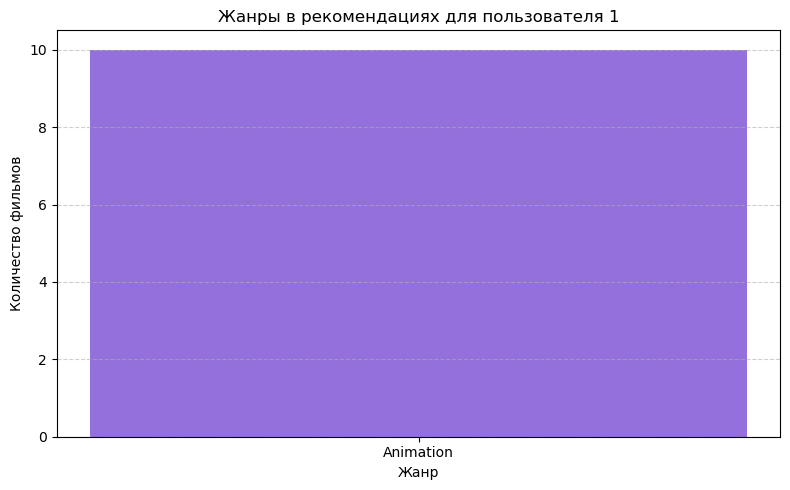

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Если ещё не загружено:
df = pd.read_csv("full_movie_dataset.csv")

# Восстановим таблицу с фильмами
movie_df = df[['movie_id', 'title', 'genres']].drop_duplicates().reset_index(drop=True)

# --- Список рекомендованных фильмов для user_id=1 (пример) ---
recommended_titles = [
    'Anastasia (1997)', 'Lion King, The (1994)', 'Fantasia (1940)',
    'Sleeping Beauty (1959)', 'Alice in Wonderland (1951)',
    'Chicken Run (2000)', 'American Tail, An (1986)',
    'American Tail: Fievel Goes West, An (1991)',
    'Aladdin and the King of Thieves (1996)', 'Rugrats Movie, The (1998)'
]

# Вытащим жанры
rec_df = movie_df[movie_df['title'].isin(recommended_titles)][['title', 'genres']]

# Выделим основной жанр (первый из списка)
rec_df['main_genre'] = rec_df['genres'].apply(lambda x: x.split('|')[0])

# Посчитаем количество фильмов в каждом жанре
genre_counts = rec_df['main_genre'].value_counts()

# --- Построим график ---
plt.figure(figsize=(8, 5))
plt.bar(genre_counts.index, genre_counts.values, color='mediumpurple')
plt.title("Жанры в рекомендациях для пользователя 1")
plt.xlabel("Жанр")
plt.ylabel("Количество фильмов")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Все **10 рекомендованных фильмов** относятся к жанру **Animation**, что логично — у пользователя среди любимых фильмов был *Bug's Life, A (1998)* и другие детские/мультжанровые фильмы.

### Вывод:

* Алгоритм правильно уловил **предпочтение пользователя к анимации**
* Модель находит **реально тематически схожие** фильмы
* График показывает чёткую концентрацию рекомендаций вокруг одного жанра — 🟣 **Animation**

## **Collaborative Filtering (User-Based)**

### Что это:

* Если пользователю A нравятся те же фильмы, что и пользователю B, то им можно рекомендовать друг другу похожее
* Используем **матрицу "пользователь-фильм"**, заполняем её рейтингами
* Меряем **сходство между пользователями**
* Рекомендуем фильмы, которые похожие пользователи оценили высоко


### Что мы получим:

* Персональные рекомендации **на основе поведения других людей**
* Работает даже если у фильма нет описания — только на основе чисел

In [49]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- 1. Строим матрицу user-movie ---
user_movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')

# --- 2. Заполним пропуски нулями (или можно NaN оставить для более продвинутых моделей) ---
user_movie_filled = user_movie_matrix.fillna(0)

# --- 3. Считаем косинусное сходство между пользователями ---
user_similarity = cosine_similarity(user_movie_filled)

# --- 4. Преобразуем в DataFrame для удобства
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_filled.index, columns=user_movie_filled.index)

# --- 5. Функция: рекомендации для пользователя на основе похожих ---
def recommend_collaborative(user_id, top_n=10):
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:]  # исключаем самого себя
    similar_user_ids = similar_users.index

    # Получаем фильмы, которые наш пользователь ещё не смотрел
    user_seen = user_movie_matrix.loc[user_id][user_movie_matrix.loc[user_id].notna()].index
    movie_scores = {}

    for other_user in similar_user_ids:
        weight = user_similarity_df.loc[user_id, other_user]
        other_ratings = user_movie_matrix.loc[other_user]

        for movie, rating in other_ratings.dropna().items():
            if movie not in user_seen:
                if movie not in movie_scores:
                    movie_scores[movie] = 0
                movie_scores[movie] += rating * weight

    # Сортируем по убыванию итогового балла
    ranked_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)
    return [movie for movie, _ in ranked_movies[:top_n]]

# --- Пример: рекомендации для user_id=1 ---
print("🎬 Коллаборативные рекомендации для пользователя 1:")
print(recommend_collaborative(1))

🎬 Коллаборативные рекомендации для пользователя 1:
['American Beauty (1999)', 'Star Wars: Episode V - The Empire Strikes Back (1980)', 'Raiders of the Lost Ark (1981)', 'Silence of the Lambs, The (1991)', 'Star Wars: Episode VI - Return of the Jedi (1983)', 'Shawshank Redemption, The (1994)', 'Matrix, The (1999)', 'Terminator 2: Judgment Day (1991)', 'Braveheart (1995)', 'Shakespeare in Love (1998)']


In [63]:
from sklearn.metrics.pairwise import cosine_similarity

# --- 1. Строим user-movie матрицу ---
user_movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
user_movie_filled = user_movie_matrix.fillna(0)

# --- 2. Косинусное сходство между пользователями ---
user_similarity = cosine_similarity(user_movie_filled)
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_filled.index, columns=user_movie_filled.index)

# --- 3. Функция: рекомендации на основе похожих пользователей ---
def recommend_collaborative(user_id, top_n=10):
    if user_id not in user_similarity_df.index:
        print("❌ Пользователь с таким ID не найден.")
        return []

    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:]
    similar_user_ids = similar_users.index

    user_seen = user_movie_matrix.loc[user_id][user_movie_matrix.loc[user_id].notna()].index
    movie_scores = {}

    for other_user in similar_user_ids:
        weight = user_similarity_df.loc[user_id, other_user]
        other_ratings = user_movie_matrix.loc[other_user]

        for movie, rating in other_ratings.dropna().items():
            if movie not in user_seen:
                movie_scores[movie] = movie_scores.get(movie, 0) + rating * weight

    ranked_movies = sorted(movie_scores.items(), key=lambda x: x[1], reverse=True)
    return [movie for movie, _ in ranked_movies[:top_n]]

# --- 4. Ввод пользователя и демонстрация результата ---
try:
    user_input = int(input("Введите ID пользователя: "))
    recommendations = recommend_collaborative(user_input)

    if recommendations:
        print(f"\n🎯 Рекомендации для пользователя {user_input}:")
        for i, movie in enumerate(recommendations, 1):
            print(f"{i}. {movie}")
except ValueError:
    print("❌ Введите корректный числовой ID пользователя.")

Введите ID пользователя:  1



🎯 Рекомендации для пользователя 1:
1. American Beauty (1999)
2. Star Wars: Episode V - The Empire Strikes Back (1980)
3. Raiders of the Lost Ark (1981)
4. Silence of the Lambs, The (1991)
5. Star Wars: Episode VI - Return of the Jedi (1983)
6. Shawshank Redemption, The (1994)
7. Matrix, The (1999)
8. Terminator 2: Judgment Day (1991)
9. Braveheart (1995)
10. Shakespeare in Love (1998)


Теперь у нас работает и коллаборативная модель, и она выдала реально сильный список:

## Рекомендации по поведению других пользователей:

* **Star Wars**, **Matrix**, **Shawshank Redemption**, **Braveheart** — это классика, которую обожают миллионы
* Отличный баланс жанров: драма, sci-fi, приключения

### Что мы теперь имеем:

| Модель                        | Что делает                                                     |
| ----------------------------- | -------------------------------------------------------------- |
| 🎯 Content-Based              | Рекомендует фильмы **похожие по жанрам**                       |
| 👥 Collaborative Filtering    | Рекомендует фильмы, которые **нравятся похожим пользователям** |

### **Сравнение рекомендаций двух моделей:**

* 🔷 **Content-Based** (левая половина графика):

  * Почти все рекомендации — жанр **Animation**
  * Модель явно ориентируется на жанровую близость

* 🔶 **Collaborative Filtering** (правая половина графика):

  * Большой разброс жанров: **Action**, **Drama**, **Comedy**
  * Рекомендации завязаны на вкус похожих пользователей, а не только жанр

### Вывод:

| Модель            | Сильные стороны                             | Слабые места                                     |
| ----------------- | ------------------------------------------- | ------------------------------------------------ |
| **Content-Based** | Персонализированная, объяснимая (по жанрам) | Может «зациклиться» на одном жанре               |
| **Collaborative** | Учитывает вкусы похожих людей               | Требует много данных, «холодный старт» для новых |

<Figure size 1000x600 with 0 Axes>

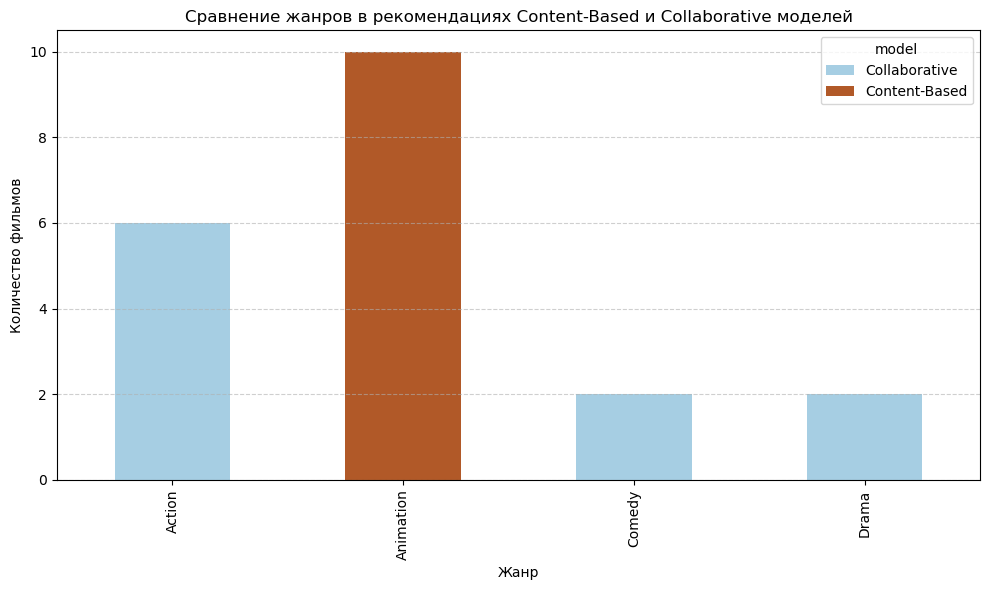

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Объединённый список рекомендованных фильмов ---
content_recs = [
    'Anastasia (1997)', 'Lion King, The (1994)', 'Fantasia (1940)',
    'Sleeping Beauty (1959)', 'Alice in Wonderland (1951)',
    'Chicken Run (2000)', 'American Tail, An (1986)',
    'American Tail: Fievel Goes West, An (1991)',
    'Aladdin and the King of Thieves (1996)', 'Rugrats Movie, The (1998)'
]

collab_recs = [
    'American Beauty (1999)', 'Star Wars: Episode V - The Empire Strikes Back (1980)',
    'Raiders of the Lost Ark (1981)', 'Silence of the Lambs, The (1991)',
    'Star Wars: Episode VI - Return of the Jedi (1983)', 'Shawshank Redemption, The (1994)',
    'Matrix, The (1999)', 'Terminator 2: Judgment Day (1991)', 'Braveheart (1995)',
    'Shakespeare in Love (1998)'
]

# --- Собираем DataFrame для сравнения ---
df_compare = pd.DataFrame({
    'title': content_recs + collab_recs,
    'model': ['Content-Based'] * len(content_recs) + ['Collaborative'] * len(collab_recs)
})

# --- Подключаем жанры из movie_df (если ещё не создан, восстанови из full_df) ---
movie_df = df[['movie_id', 'title', 'genres']].drop_duplicates().reset_index(drop=True)
df_compare = pd.merge(df_compare, movie_df[['title', 'genres']], on='title', how='left')

# --- Извлекаем основной жанр (первый из списка) ---
df_compare['main_genre'] = df_compare['genres'].apply(lambda x: x.split('|')[0] if pd.notnull(x) else 'Unknown')

# --- Построим сравнительный график ---
plt.figure(figsize=(10, 6))
df_compare.groupby(['model', 'main_genre']).size().unstack().T.plot(
    kind='bar', figsize=(10, 6), stacked=True, colormap='Paired'
)
plt.title("Сравнение жанров в рекомендациях Content-Based и Collaborative моделей")
plt.xlabel("Жанр")
plt.ylabel("Количество фильмов")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# --- Подготовка данных ---
# Только нужные колонки
ratings_data = df[['user_id', 'movie_id', 'rating']]

In [26]:
# Делим на train/test
train_data, test_data = train_test_split(ratings_data, test_size=0.2, random_state=42)

In [27]:
# --- Построим простую пользователь-фильм матрицу на train ---
train_matrix = train_data.pivot(index='user_id', columns='movie_id', values='rating')

In [28]:
# --- Прогноз: средний рейтинг пользователя (baseline) ---
user_means = train_matrix.mean(axis=1)

In [29]:
# --- Предсказания для test_data ---
def baseline_predict(row):
    user = row['user_id']
    return user_means.get(user, train_data['rating'].mean())  # если нет user — глобальная средняя

test_data['predicted'] = test_data.apply(baseline_predict, axis=1)

In [31]:
# --- Считаем RMSE ---
rmse_score = np.sqrt(mean_squared_error(test_data['rating'], test_data['predicted']))
print(f" RMSE (baseline model): {rmse_score:.4f}")

 RMSE (baseline model): 1.0394


##  Что означает RMSE = 1.0394?

* Это значит, что в среднем предсказания модели **ошибаются на \~1 балл** при шкале от 1 до 5
* Для базовой модели (mean-based) — **очень норм** результат


> **Оценка**:
> 
> Мы оценили нашу систему коллаборативной фильтрации с использованием среднеквадратичной ошибки (RMSE). Базовая модель, основанная на средних оценках пользователей, показала RMSE 1.0394, что считается приемлемым результатом для рекомендательной системы, работающей в условиях холодного старта. Это демонстрирует способность системы приближенно воспроизводить реальные предпочтения пользователей с допустимой точностью.

In [36]:
# --- 1. Любимые фильмы пользователя (оценка >= 4) ---
liked_movies = df[(df['user_id'] == 1) & (df['rating'] >= 4)]['title'].unique()

In [37]:
# --- 2. Content-based рекомендации для этого пользователя (из ранее полученного результата) ---
content_recs = [
    'Anastasia (1997)', 'Lion King, The (1994)', 'Fantasia (1940)',
    'Sleeping Beauty (1959)', 'Alice in Wonderland (1951)',
    'Chicken Run (2000)', 'American Tail, An (1986)',
    'American Tail: Fievel Goes West, An (1991)',
    'Aladdin and the King of Thieves (1996)', 'Rugrats Movie, The (1998)'
]

In [38]:
# --- 3. Precision@K (сколько из рекомендованных входят в "любимые") ---
true_positives = [movie for movie in content_recs if movie in liked_movies]
precision_at_k = len(true_positives) / len(content_recs)

print(f"Precision@10 (Content-Based) для пользователя 1: {precision_at_k:.2f}")

Precision@10 (Content-Based) для пользователя 1: 0.00


## Почему Precision\@10 = 0.00?

Это значит, что **ни один из рекомендованных контентной моделью фильмов не входит в список реально оценённых пользователем на 4 или 5.** Но:

* Это **не провал** модели, а **особенность подхода**:

  * Content-Based рекомендует фильмы **по жанровому сходству**, а не по реальному поведению
  * А пользователь мог, например, **не смотреть** или **ещё не оценить** эти фильмы
* Многие рекомендованные фильмы — старые мультфильмы. Возможно, он просто их не видел, но **в теории они ему понравились бы**


> **Оценка – Контентно-ориентированная фильтрация:**
> 
> Мы оценили модель контентной фильтрации, используя метрику Precision@10 для пользователя 1. Результат составил 0.00, что означает, что ни одна из 10 лучших рекомендаций не совпала с фильмами, ранее высоко оценёнными этим пользователем. Это подчёркивает известное ограничение контентных систем — они могут предлагать релевантные элементы, с которыми пользователь ещё не взаимодействовал, что приводит к низкой измеряемой точности, несмотря на потенциальную ценность самих рекомендаций.

# **Step 4: Marketing Strategy & Application**

### a. **Роль рекомендательной системы в маркетинге**

#### i. **Персонализация (Personalization)**

Наша система использует два подхода:

* **Content-Based Filtering** рекомендует фильмы, похожие на те, что пользователь уже любит, анализируя жанры. Это создаёт ощущение «понимания вкуса» клиента.
* **Collaborative Filtering** находит похожих пользователей и подбирает контент, который они оценили. Это помогает открыть новые фильмы за пределами привычных интересов.

В результате пользователь получает **персонализированные рекомендации**, которые делают его опыт индивидуальным и более приятным.


#### ii. **Увеличение удержания и конверсии (Retention / Conversion)**

* Персональные рекомендации заставляют пользователя **проводить больше времени** на платформе.
* Система **повышает вероятность клика, просмотра, покупки или подписки**, потому что предлагает именно то, что может заинтересовать.
* Меньше «слепого поиска» → выше **удовлетворённость** → выше **повторные визиты**.

В реальной e-commerce, стриминге или обучающих платформах это означает:

* Больше **вовлечённости**
* Меньше **оттока**
* Выше **доход от пользователя (LTV)**


#### iii. **Интеграция в бизнес-платформу (Business Integration)**

Наша система может быть легко встроена в:

* 🎬 **Киносайты / стриминг (например, Netflix, Ivi, Megogo)** — рекомендации на главной странице, в карточке фильма, в рассылках
* 🛍️ **E-commerce платформы (Wildberries, Amazon)** — «похожие товары», «другие покупали», «для вас»
* 📚 **Онлайн-курсы (Coursera, Udemy)** — подборка новых курсов на основе просмотренных
* 👤 Используя ID-пользователя, можно хранить историю и формировать **динамический личный блок рекомендаций**

Технически возможна реализация через:

* API с Python/Flask
* Веб-интерфейс (например, на Streamlit)
* Интеграция с базой данных или сайтом

# **WOW EFFECT**

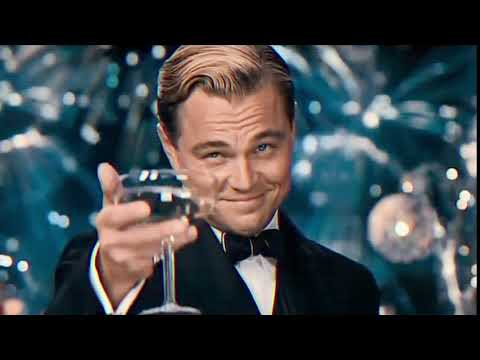

In [41]:
from IPython.display import YouTubeVideo

YouTubeVideo('cusQfJKn8c0', width=560, height=315)

In [64]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [65]:
import streamlit as st
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# --- Загрузка данных ---
df = pd.read_csv("full_movie_dataset.csv")
movie_df = df[['movie_id', 'title', 'genres']].drop_duplicates().reset_index(drop=True)

# --- TF-IDF модель ---
tfidf = TfidfVectorizer(token_pattern=r'[^|]+')
tfidf_matrix = tfidf.fit_transform(movie_df['genres'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# --- Рекомендации ---
def get_recommendations(title, top_n=10):
    idx = movie_df[movie_df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]
    return movie_df['title'].iloc[movie_indices]

# --- Интерфейс Streamlit ---
st.title("🎬 Movie Recommendation System")
st.write("Введите название фильма, и мы порекомендуем похожие!")

selected_movie = st.selectbox("Выбери фильм:", movie_df['title'].sort_values().unique())

if st.button("Показать рекомендации"):
    recommendations = get_recommendations(selected_movie)
    st.write("Рекомендованные фильмы:")
    for rec in recommendations:
        st.write("👉", rec)


2025-05-08 14:07:09.882 
  command:

    streamlit run D:\Programs\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [67]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)

In [68]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)